In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from keras.models import Sequential # try tensorflow.keras.models in case of import error
from keras.layers import Dense # try tensorflow.keras.layers in case of import error
from sklearn.metrics import classification_report
# import training/testing dataset

training_df = pd.read_csv(Path("../Resources/training_dataset_original.csv"))
testing_df = pd.read_csv(Path("../Resources/testing_dataset.csv"))
# split training dataset to X and y

X_train = training_df.drop(columns="status")
y_train = training_df["status"]
# split testing dataset to X and y

X_test = testing_df.drop(columns="status")
y_test = testing_df["status"]

In [3]:
activation_list = ['relu', 'tanh', 'gelu', 'linear', 'selu']
output_list = ['sigmoid', 'softmax', 'softplus', 'softsign', 'swish']
optimizer_list = ['adadelta', 'adagrad', 'adam', 'adamax', 'nadam', 'ftrl', 'rmsprop', 'sgd']

In [3]:
for optimizer in optimizer_list:
    # set instance
    neural_network = Sequential()

    # set parameters for neural network model
    number_input_features = len(X_train.columns)
    number_output = 1
    hidden_nodes_layer1 = 32
    hidden_nodes_layer2 = 16

    # set hidden layers
    neural_network.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))
    neural_network.add(Dense(units=hidden_nodes_layer2, activation='relu'))
    neural_network.add(Dense(units=number_output, activation='sigmoid'))

    # compile the model
    neural_network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Fit the model using 100 epochs and the training data
    neural_network.fit(X_train, y_train, epochs=100, verbose=0)

    # save trained model
    neural_network.save(f"../Resources/neural_network_models/{optimizer}.h5")

    # make prediction and print classification report
    y_pred = neural_network.predict(X_test)
    y_pred = np.where(y_pred < 0.5, 0, 1)

    # pring results
    print(f"Optimizer: {optimizer}")
    print(classification_report(y_test, y_pred))

615/615 [==============================] - 1s 1ms/step
Optimizer: adadelta
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.00      0.00      0.00      1254

    accuracy                           0.94     19671
   macro avg       0.47      0.50      0.48     19671
weighted avg       0.88      0.94      0.91     19671

615/615 [==============================] - 1s 1ms/step
Optimizer: adagrad
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.00      0.00      0.00      1254

    accuracy                           0.94     19671
   macro avg       0.47      0.50      0.48     19671
weighted avg       0.88      0.94      0.91     19671

615/615 [==============================] - 1s 1ms/step
Optimizer: adam
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1     

c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


615/615 [==============================] - 1s 1ms/step
Optimizer: rmsprop
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.53      0.01      0.01      1254

    accuracy                           0.94     19671
   macro avg       0.73      0.50      0.49     19671
weighted avg       0.91      0.94      0.91     19671

615/615 [==============================] - 1s 1ms/step
Optimizer: sgd
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.42      0.01      0.02      1254

    accuracy                           0.94     19671
   macro avg       0.68      0.50      0.49     19671
weighted avg       0.90      0.94      0.91     19671



In [5]:
for output in output_list:
    # set instance
    neural_network = Sequential()

    # set parameters for neural network model
    number_input_features = len(X_train.columns)
    number_output = 1
    hidden_nodes_layer1 = 32
    hidden_nodes_layer2 = 16

    # set hidden layers
    neural_network.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='relu'))
    neural_network.add(Dense(units=hidden_nodes_layer2, activation='relu'))
    neural_network.add(Dense(units=number_output, activation=f'{output}'))

    # compile the model
    neural_network.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

    # Fit the model using 100 epochs and the training data
    neural_network.fit(X_train, y_train, epochs=100, verbose=0)

    # save trained model
    neural_network.save(f"../Resources/neural_network_models/{output}.h5")

    # make prediction and print classification report
    y_pred = neural_network.predict(X_test)
    y_pred = np.where(y_pred < 0.5, 0, 1)

    # pring results
    print(f"Optimizer: {output}")
    print(classification_report(y_test, y_pred))

615/615 [==============================] - 1s 1ms/step
Optimizer: sigmoid
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.49      0.05      0.09      1254

    accuracy                           0.94     19671
   macro avg       0.71      0.52      0.53     19671
weighted avg       0.91      0.94      0.91     19671

615/615 [==============================] - 1s 1ms/step
Optimizer: softmax
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18417
           1       0.06      1.00      0.12      1254

    accuracy                           0.06     19671
   macro avg       0.03      0.50      0.06     19671
weighted avg       0.00      0.06      0.01     19671



c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


615/615 [==============================] - 1s 1ms/step
Optimizer: softplus
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.58      0.03      0.06      1254

    accuracy                           0.94     19671
   macro avg       0.76      0.51      0.51     19671
weighted avg       0.92      0.94      0.91     19671

615/615 [==============================] - 1s 1ms/step
Optimizer: softsign
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.00      0.00      0.00      1254

    accuracy                           0.94     19671
   macro avg       0.47      0.50      0.48     19671
weighted avg       0.88      0.94      0.91     19671



c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yutak\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


615/615 [==============================] - 1s 1ms/step
Optimizer: swish
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.55      0.04      0.08      1254

    accuracy                           0.94     19671
   macro avg       0.74      0.52      0.52     19671
weighted avg       0.91      0.94      0.91     19671



In [6]:
for activation in activation_list:
    # set instance
    neural_network = Sequential()

    # set parameters for neural network model
    number_input_features = len(X_train.columns)
    number_output = 1
    hidden_nodes_layer1 = 32

    # set hidden layers
    neural_network.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation=f'{activation}'))
    neural_network.add(Dense(units=number_output, activation='softplus'))

    # compile the model
    neural_network.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

    # Fit the model using 100 epochs and the training data
    neural_network.fit(X_train, y_train, epochs=20, verbose=0)

    # save trained model
    neural_network.save(f"../Resources/neural_network_models/{activation}.h5")

    # make prediction and print classification report
    y_pred = neural_network.predict(X_test)
    y_pred = np.where(y_pred < 0.5, 0, 1)

    # pring results
    print(f"Activation: {activation}")
    print(classification_report(y_test, y_pred))

615/615 [==============================] - 1s 947us/step
Activation: relu
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.43      0.00      0.01      1254

    accuracy                           0.94     19671
   macro avg       0.68      0.50      0.49     19671
weighted avg       0.90      0.94      0.91     19671

615/615 [==============================] - 1s 999us/step
Activation: tanh
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.42      0.01      0.02      1254

    accuracy                           0.94     19671
   macro avg       0.68      0.50      0.49     19671
weighted avg       0.90      0.94      0.91     19671

615/615 [==============================] - 1s 1ms/step
Activation: gelu
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1     

In [7]:
# set instance
neural_network = Sequential()

# set parameters for neural network model
number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 2

# set hidden layers
neural_network.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='selu'))
neural_network.add(Dense(units=hidden_nodes_layer2, activation='selu'))
neural_network.add(Dense(units=hidden_nodes_layer3, activation='selu'))
neural_network.add(Dense(units=hidden_nodes_layer4, activation='selu'))
neural_network.add(Dense(units=number_output, activation='softplus'))

# compile the model
neural_network.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Fit the model using 100 epochs and the training data
neural_network.fit(X_train, y_train, epochs=100, verbose=1)

# save trained model
neural_network.save(f"../Resources/neural_network_models/four_layers.h5")

# make prediction and print classification report
y_pred = neural_network.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)

# pring results
print("four layers")
print(classification_report(y_test, y_pred))

Epoch 1/100
1845/1845 [==============================] - 24s 13ms/step - loss: 0.3306 - accuracy: 0.9240
Epoch 2/100
1845/1845 [==============================] - 25s 14ms/step - loss: 0.2455 - accuracy: 0.9323
Epoch 3/100
1845/1845 [==============================] - 22s 12ms/step - loss: 0.2384 - accuracy: 0.9327
Epoch 4/100
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2358 - accuracy: 0.9326
Epoch 5/100
1845/1845 [==============================] - 22s 12ms/step - loss: 0.2343 - accuracy: 0.9328
Epoch 6/100
1845/1845 [==============================] - 21s 12ms/step - loss: 0.2332 - accuracy: 0.9328
Epoch 7/100
1845/1845 [==============================] - 21s 11ms/step - loss: 0.2322 - accuracy: 0.9328
Epoch 8/100
1845/1845 [==============================] - 23s 13ms/step - loss: 0.2316 - accuracy: 0.9328
Epoch 9/100
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2313 - accuracy: 0.9328
Epoch 10/100
1845/1845 [==============================]

In [14]:
# make prediction and print classification report
y_pred = neural_network.predict(X_test)
y_pred = np.where(y_pred < np.mean(y_pred)**np.std(y_pred), 0, 1)

# pring results
print("four layers")
print(classification_report(y_test, y_pred))

615/615 [==============================] - 1s 2ms/step
four layers
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.88      0.01      0.01      1254

    accuracy                           0.94     19671
   macro avg       0.91      0.50      0.49     19671
weighted avg       0.93      0.94      0.91     19671



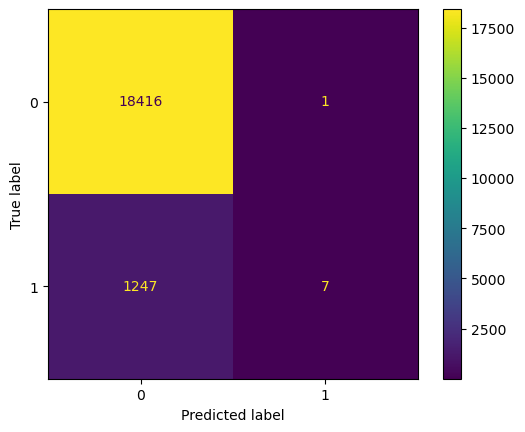

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
matrix.plot()
plt.show()

Epoch 1/32
1845/1845 [==============================] - 23s 12ms/step - loss: 0.2561 - accuracy: 0.9312
Epoch 2/32
1845/1845 [==============================] - 25s 14ms/step - loss: 0.2356 - accuracy: 0.9329
Epoch 3/32
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2341 - accuracy: 0.9328
Epoch 4/32
1845/1845 [==============================] - 25s 14ms/step - loss: 0.2344 - accuracy: 0.9329
Epoch 5/32
1845/1845 [==============================] - 22s 12ms/step - loss: 0.2335 - accuracy: 0.9327
Epoch 6/32
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2311 - accuracy: 0.9330
Epoch 7/32
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2305 - accuracy: 0.9329
Epoch 8/32
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2297 - accuracy: 0.9330
Epoch 9/32
1845/1845 [==============================] - 24s 13ms/step - loss: 0.2292 - accuracy: 0.9331
Epoch 10/32
1845/1845 [==============================] - 25s 13m

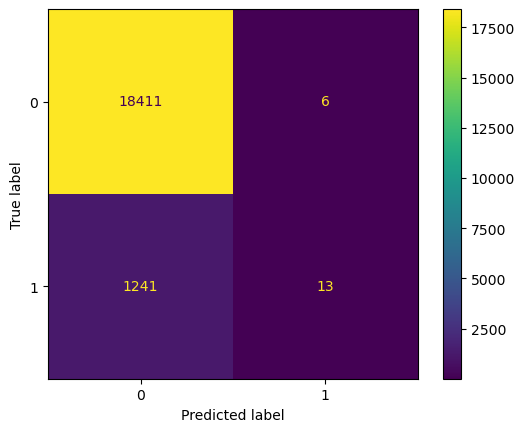

In [16]:
# set instance
neural_network = Sequential()

# set parameters for neural network model
number_input_features = len(X_train.columns)
number_output = 1
hidden_nodes_layer1 = 96
hidden_nodes_layer2 = 48
hidden_nodes_layer3 = 24
hidden_nodes_layer4 = 12

# set hidden layers
neural_network.add(Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation='selu'))
neural_network.add(Dense(units=hidden_nodes_layer2, activation='selu'))
neural_network.add(Dense(units=hidden_nodes_layer3, activation='selu'))
neural_network.add(Dense(units=hidden_nodes_layer4, activation='selu'))
neural_network.add(Dense(units=number_output, activation='softplus'))

# compile the model
neural_network.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Fit the model using 100 epochs and the training data
neural_network.fit(X_train, y_train, epochs=32, verbose=1)

# save trained model
neural_network.save(f"../Resources/neural_network_models/96nodes_4layers_32epochs.h5")

# make prediction and print classification report
y_pred = neural_network.predict(X_test)
y_pred = np.where(y_pred < np.mean(y_pred)**np.std(y_pred), 0, 1)

# pring results
print("A lot of nodes")
print(classification_report(y_test, y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
matrix.plot()
plt.show()

615/615 [==============================] - 1s 2ms/step
0.86876917
A lot of nodes
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18417
           1       0.69      0.01      0.02      1254

    accuracy                           0.94     19671
   macro avg       0.81      0.50      0.49     19671
weighted avg       0.92      0.94      0.91     19671



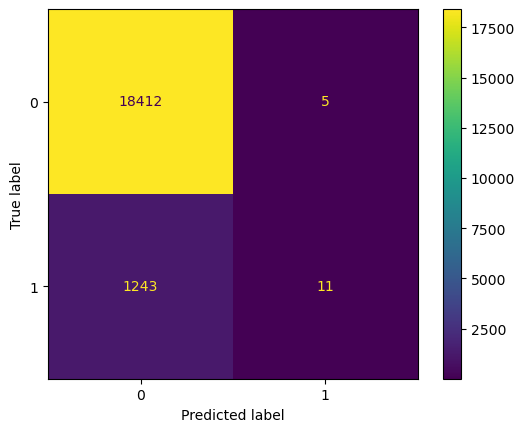

In [56]:
# make prediction and print classification report
y_pred = neural_network.predict(X_test)

threshold = np.mean(y_pred) ** np.median(y_pred)

y_pred = np.where(y_pred < threshold, 0, 1)

# pring results
print(threshold)
print("A lot of nodes")
print(classification_report(y_test, y_pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
matrix.plot()
plt.show()